---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [5]:
import pandas as pd
import numpy as np


def prepare_energy():
    # Reading excel file Energy Indicators.xls and excluding header and footer rows
    energy = pd.read_excel('Energy Indicators.xls', skiprows=17, skipfooter=38)
    # Getting rid of the first two columns
    energy = energy.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1)
    # Renaming columns to the previous defined pattern
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    # Replacing empty data '...' with np.NaN
    energy = energy.replace(to_replace='...', value=np.NaN)
    # Converting 'Energy Supply from peta to gigajoules.'
    energy['Energy Supply'] = energy['Energy Supply'] * 10**6
    # Cleaning countries names of parenthisis and numbers
    # and renaming some countries names
    rename_dict_energy = {
        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"}
    energy = (energy.replace('\s?\(.*\)\s?|[0-9]*', '', regex=True)
                    .replace({'Country': rename_dict_energy}))
    
    return energy

def prepare_GDP():
    # Reading csv file world_bank.csv and excluding its header and footer unused rows
    GDP = pd.read_csv('world_bank.csv', skiprows=4, header=0)
    # Slicing DF
    GDP = GDP[['Country Name', '2006', '2007', '2008', '2009',
               '2010', '2011', '2012', '2013', '2014', '2015']]
    # Replacing some countries names
    rename_dict_GDP = {
        "Korea, Rep.": "South Korea",
        "Iran, Islamic Rep.": "Iran",
        "Hong Kong SAR, China": "Hong Kong"}
    GDP = GDP.replace({'Country Name': rename_dict_GDP})
    
    return GDP

def prepare_ScimEn():
    # Reading excel file scimagojr-3.xlsx and cleaning it
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    
    return ScimEn

def answer_one():
    energy = prepare_energy()
    GDP = prepare_GDP()
    ScimEn = prepare_ScimEn()[:15]
    # Merging DataFrames
    new_df = pd.merge(GDP, energy, how='left', left_on='Country Name', right_on='Country')
    new_df = pd.merge(ScimEn, new_df, how='left', left_on="Country", right_on='Country')
    new_df = new_df.set_index('Country')
    new_df = new_df.drop('Country Name', axis=1)
    
    return new_df

# answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1.271910e+11,93.0,19.754910
United States,2,96661,94747,792274,265436,8.20,230,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,9.083800e+10,286.0,11.570980
Japan,3,30504,30287,223024,61554,7.31,134,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,1.898400e+10,149.0,10.232820
United Kingdom,4,20944,20357,206091,37874,9.84,139,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,7.920000e+09,124.0,10.600470
Russian Federation,5,18534,18301,34266,12422,1.85,57,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,3.070900e+10,214.0,17.288680
Canada,6,17899,17620,215003,40930,12.01,149,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,1.043100e+10,296.0,61.945430
Germany,7,17027,16831,140566,27426,8.26,126,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,1.326100e+10,165.0,17.901530
India,8,15005,14841,128763,37209,8.58,115,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,3.319500e+10,26.0,14.969080
France,9,13153,12973,130632,28601,9.93,114,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,1.059700e+10,166.0,17.020280


### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [2]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [9]:
# WRONG
def answer_two():
    # Loading DataFrames
    energy = prepare_energy()
    GDP = prepare_GDP().rename(columns={'Country Name': 'Country'})
    ScimEn = prepare_ScimEn()
    # Outer Join
    noloss_df = pd.merge(energy, GDP, how='outer', on='Country')
    noloss_df = pd.merge(noloss_df, ScimEn, how='outer', on='Country')
    # Inner Join
    before_reduce = pd.merge(energy, GDP, how='inner', on='Country')
    before_reduce = pd.merge(before_reduce, ScimEn, how='inner', on='Country')
    # Calculating how many rows were lost
    rows_lost = noloss_df.shape[0] - before_reduce.shape[0]

    return rows_lost
    
# answer_two()

156

## Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [12]:
# WRONG - 12 differences
def answer_three():
    # Loading answer_one DataFrame
    Top15 = answer_one()
    # Calculating the avgGDP
    avgGDP = (Top15.iloc[:,7:17]
                   .mean(axis=1, skipna=True)
                   .sort_values(ascending=False))

    return pd.Series(avgGDP, name='avgGDP')

# answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [15]:
# WRONG
def answer_four():
    # Loading answer_one DataFrame
    Top15 = answer_one()
    # Grab the 6th country in answer_two Series
    country = answer_three().index.values[5]
    # Calculating the GDP change
    changed_gdp = Top15.loc[country]['2015'] - Top15.loc[country]['2006']

    return changed_gdp

# answer_four()

246702696075.3999

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [9]:
def answer_five():
    # Loading answer_one DataFrame
    Top15 = answer_one()
    # Calculating the mean Energy Supply per Capita
    mean_espc = Top15['Energy Supply per Capita'].mean()

    return mean_espc

# answer_five()

157.59999999999999

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [10]:
def answer_six():
    # Loading answer_one DataFrame
    Top15 = answer_one()
    # Collecting the desired data
    country = Top15['% Renewable'].idxmax()
    value = Top15['% Renewable'].max()

    return (country, value)

# answer_six()

('Brazil', 69.648030000000006)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [11]:
def answer_seven():
    # Loading answer_one DataFrame
    Top15 = answer_one()
    # Creating new column
    Top15['Citations Ratio'] = Top15['Self-citations'] / Top15['Citations']
    # Collecting the desired data
    country = Top15['Citations Ratio'].idxmax()
    value = Top15['Citations Ratio'].max()

    return (country, value)

# answer_seven()

('China', 0.68931261793894216)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [12]:
def answer_eight():
    # Loading answer_one DataFrame
    Top15 = answer_one()
    # Creating Population Estimative column
    Top15['Population Estimative'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    # Sorting descending
    Top15 = Top15['Population Estimative'].sort_values(ascending=False)
    # Grabing the third one
    third_country = Top15.index.values[2]

    return third_country

# answer_eight()

'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [13]:
def answer_nine():
    # Loading answer_one DataFrame
    Top15 = answer_one()
    # Addind the Population Estimative column
    Top15['Population Estimative'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    # Creating Citable Documents per Capta column
    Top15['Citable Documents per Capta'] = Top15['Citable documents'] / Top15['Population Estimative']
    # Calculating the correlation between Citable Documents per Capta and Energy Supply per Capta
    new_df = Top15[['Citable Documents per Capta', 'Energy Supply per Capita']]

    return new_df.corr()['Energy Supply per Capita'][0]

# answer_nine()

0.79400104354429435

In [14]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

In [15]:
#plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [19]:
# WRONG - 10 differences
def answer_ten():
    # Loading answer_one DataFrame
    Top15 = answer_one()
    # Calculating the mean of % Renewable energy column
    mean_renewable = Top15['% Renewable'].median()
    Top15['HighRenew'] = np.where(Top15['% Renewable'] >= mean_renewable, 1, 0)

    return pd.Series(Top15['HighRenew'], name='HighRenew')

# answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [34]:
# WRONG - shape (5,4) should be (5,3)
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

def answer_eleven():
    # Loading answer_one DataFrame
    Top15 = answer_one()
    # Population Estimate
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    # Reseting index
    Top15 = Top15.reset_index()
    # Mapping dict to a new column called Continent
    Top15['Continent'] = Top15['Country'].map(ContinentDict)
    # Grouping By
    Top15 = (Top15.groupby('Continent')
                  .agg({'PopEst': [np.size, np.sum, np.mean, np.std]}))
    Top15.columns = Top15.columns.droplevel(0)

    return Top15

answer_eleven()

,size,sum,mean,std
Continent,,,,
Asia,5.0,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [71]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

def answer_twelve():
    # Loading answer_one DataFrame
    Top15 = answer_one()
    # Reseting index
    Top15 = Top15.reset_index()
    # Mapping dict to a new column called Continent
    Top15['Continent'] = Top15['Country'].map(ContinentDict)
    # Separating % Renewable into a Series
    renewable = Top15[['% Renewable','Continent']]
    # Applying pd.cut to separate in 5 bins
    renewable['% Renewable'] = pd.cut(renewable['% Renewable'], bins=5)
    # Adding a column of Ones
    renewable['Count'] = np.ones(renewable.shape[0])
    # Grouping by Continent and bins count
    final_series = (renewable.groupby(['Continent', '% Renewable'])
                             .count()
                             .dropna())

    return final_series['Count']

# answer_twelve()

Continent      % Renewable     
Asia           (2.212, 15.753]     4.0
               (15.753, 29.227]    1.0
Australia      (2.212, 15.753]     1.0
Europe         (2.212, 15.753]     1.0
               (15.753, 29.227]    3.0
               (29.227, 42.701]    2.0
North America  (2.212, 15.753]     1.0
               (56.174, 69.648]    1.0
South America  (56.174, 69.648]    1.0
Name: Count, dtype: float64

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [25]:
# WRONG - 15 differences
def answer_thirteen():
    # Loading answer_one DataFrame
    Top15 = answer_one()
    # Population Estimative series
    Top15['Population Estimative'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Population Estimative'] = Top15['Population Estimative'].map('{:,}'.format)
    # PopEst column -> series
    PopEst = pd.Series(Top15['Population Estimative'], name='PopEst')

    return PopEst

# answer_thirteen()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [6]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


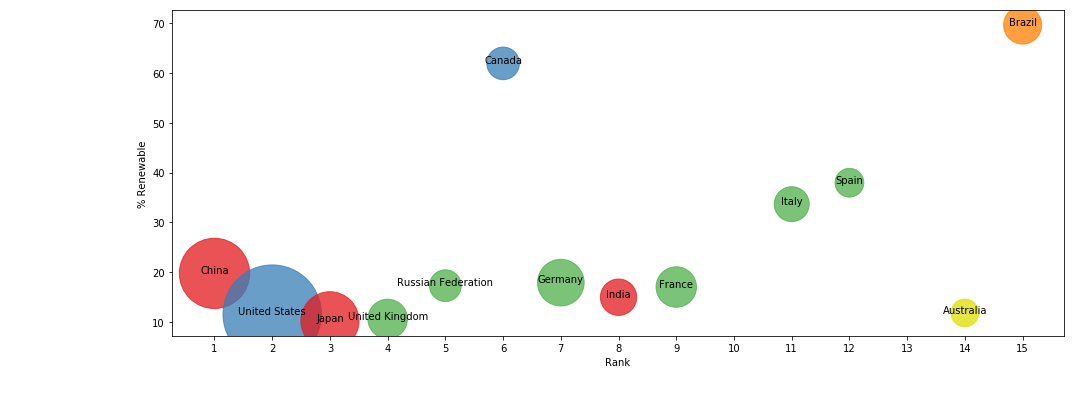

In [7]:
# plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!